Data 606 Data Cleaning and Text Summerization

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [ ]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df = pd.read_csv('/content/ArticlesText1000.csv')

In [ ]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,PMC8955671,35329290,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,"Betegón, Elena; Rodríguez-Medina, Jairo; del-V...",Int J Environ Res Public Health,NaN,NaN,NaN,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,Introduction\n\nAdolescence is considered as a...
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,NaN,NaN,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,"Fisman, D.; Greer, A. L.; Tuite, A.",NaN,NaN,NaN,NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,Introduction\n\nSince the COVID-19 pandemic wa...
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,PMC8789203,35106246.0,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,"Amano, Shiho; Ohta, Ryuichi; Sano, Chiaki",Cureus,NaN,NaN,NaN,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,Introduction\n\nNatural killer T (NKT) cell ly...
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,PMC9010067,35426031,no-cc,We examined how object categories and scene co...,2022-04-14,"Kershner, Ariel M.; Hollingworth, Andrew",Atten Percept Psychophys,NaN,NaN,NaN,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,Introduction\n\nTo perform most real-world act...
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,PMC8642440,34862487.0,cc-by,The goal of the present work was to examine cl...,2021-12-03,"Clouston, Sean A. P.; Luft, Benjamin J.; Sun, ...",Sci Rep,NaN,NaN,NaN,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,Scientific Reports\n\n| (2021) 11:23414 | http...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          1000 non-null   object 
 1   sha               1000 non-null   object 
 2   source_x          1000 non-null   object 
 3   title             1000 non-null   object 
 4   doi               969 non-null    object 
 5   pmcid             910 non-null    object 
 6   pubmed_id         820 non-null    object 
 7   license           1000 non-null   object 
 8   abstract          875 non-null    object 
 9   publish_time      1000 non-null   object 
 10  authors           996 non-null    object 
 11  journal           929 non-null    object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          36 non-null     float64
 15  pdf_json_files    1000 non-null   object 
 16  pmc_json_files    804 non-null    object 
 

In [ ]:
df.isna().sum()

cord_uid               0
sha                    0
source_x               0
title                  0
doi                   31
pmcid                 90
pubmed_id            180
license                0
abstract             125
publish_time           0
authors                4
journal               71
mag_id              1000
who_covidence_id    1000
arxiv_id             964
pdf_json_files         0
pmc_json_files       196
url                    0
s2_id                148
body_text              0
dtype: int64

In [ ]:
df.shape

(1000, 20)

In [ ]:
df.describe()

,mag_id,who_covidence_id,arxiv_id,s2_id
count,0.0,0.0,36.000000,8.520000e+02
mean,NaN,NaN,2050.523114,2.147824e+08
std,NaN,NaN,193.143117,6.011818e+07
min,NaN,NaN,1006.012300,1.082400e+04
25%,NaN,NaN,2007.082713,2.211093e+08
50%,NaN,NaN,2104.062085,2.324793e+08
75%,NaN,NaN,2108.047755,2.400733e+08
max,NaN,NaN,2205.056080,2.491293e+08


Cleaning and Preprocessing the data

The stop-word function’s purpose was to skim over the dataset and remove stop-words which are to iterate “a”, “the”, “is”, and “are” etc. This would result in accurate results for displaying data.

I also used the function “.join(x.lower()” to make all letters into lowercase letters.

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
df = df[df['body_text'].notnull()]

In [ ]:
df['body_text']=df['body_text'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop_words))
df['body_text'].head(10)

0    introduction adolescence considered transition...
1    introduction since covid-19 pandemic declared ...
2    introduction natural killer t (nkt) cell lymph...
3    introduction to perform real-world activities,...
4    scientific reports | (2021) 11:23414 | https:/...
5    | introduction the emergence novel public heal...
6    the mainstay asthma management fast becoming c...
7    lernens 7 zugleich als "enhancement"-dispositi...
8    introduction severe acute respiratory syndrome...
9    theoretical framework thresholded lamp-osd in ...
Name: body_text, dtype: object

In [ ]:
#Deletes punctuation
#Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
df['body_text']=df['body_text'].str.replace('[^\w\s]','')
df['body_text'].head(10)

<ipython-input-13-48c64138ad5c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body_text']=df['body_text'].str.replace('[^\w\s]','')


0    introduction adolescence considered transition...
1    introduction since covid19 pandemic declared w...
2    introduction natural killer t nkt cell lymphom...
3    introduction to perform realworld activities p...
4    scientific reports  2021 1123414  httpsdoiorg1...
5     introduction the emergence novel public healt...
6    the mainstay asthma management fast becoming c...
7    lernens 7 zugleich als enhancementdispositiv z...
8    introduction severe acute respiratory syndrome...
9    theoretical framework thresholded lamposd in l...
Name: body_text, dtype: object

In [ ]:
#Count the number of words in Reviews
#Reference: https://towardsdatascience.com/9-functions-that-make-natural-language-pre-processing-a-piece-of-cake-8b885c151955
df['number_words']=[len(x.split()) for x in df['body_text'].tolist()]
df.head(10)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,PMC8955671,35329290,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,...,Int J Environ Res Public Health,NaN,NaN,NaN,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,NaN,NaN,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,...,NaN,NaN,NaN,NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,PMC8789203,35106246.0,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,...,Cureus,NaN,NaN,NaN,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,PMC9010067,35426031,no-cc,We examined how object categories and scene co...,2022-04-14,...,Atten Percept Psychophys,NaN,NaN,NaN,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,PMC8642440,34862487.0,cc-by,The goal of the present work was to examine cl...,2021-12-03,...,Sci Rep,NaN,NaN,NaN,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767
5,p6maxwnz,8bfe1dbfcfa3e3f1e0c2284f51ef09c991bba946,Medline; PMC; WHO,Greek teachers' resilience levels during the C...,10.1002/pits.22709,PMC9088383,35572178.0,no-cc,The mandatory closure of schools due to the Co...,2022-04-27,...,Psychol Sch,NaN,NaN,NaN,document_parses/pdf_json/8bfe1dbfcfa3e3f1e0c22...,document_parses/pmc_json/PMC9088383.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35572178/;...,248692999.0,introduction the emergence novel public healt...,3543
6,r1ao540t,8740732439d504fa76487172c1757d79ea451a7e,Medline; PMC; WHO,Asthma management and impact on COVID‐19 outcomes,10.1111/cea.14000,PMC8653073,34476864.0,no-cc,NaN,2021-09-02,...,Clin Exp Allergy,NaN,NaN,NaN,document_parses/pdf_json/8740732439d504fa76487...,document_parses/pmc_json/PMC8653073.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34476864/;...,237392395.0,the mainstay asthma management fast becoming c...,640
7,xxhydcq8,d2ab521a19a90baddae4bafb53b200b8eaa37e84,PMC,Narrative Wissenschaft und die Notwendigkeit n...,10.1007/978-3-658-32916-7_2,PMC7979100,NaN,no-cc,"Vom Leben handeln die Geschichten, welche die ...",2021-03-20,...,Gew&#x000e4;hrleistungsstaatlichkeit zwischen ...,NaN,NaN,NaN,document_parses/pdf_json/d2ab521a19a90baddae4b...,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,lernens 7 zugleich als enhancementdispositiv z...,3920
8,ko490awu,b8cb818450df2d8001b5fe6a8708e21720e4bfd3,Medline; PMC,The SARS-CoV-2 B.1.1.529 Omicron virus causes ...,10.21203/rs.3.rs-1211792/v1,PMC8722607,34981044.0,cc-by,Despite the 

Sentiment Analysis

In [ ]:
df['body_text']= df['body_text'].astype(str)

In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

Below Sentiment Analysis was perfromed where we find the polarity and subjectivity based on the documents presented.

Polarity refers to the degree to which a text expresses positive or negative sentiment. In other words, polarity reflects the overall emotional tone of the text.

Subjectivity, on the other hand, refers to the degree to which a text expresses a personal opinion, belief, or emotion, rather than simply stating objective facts.

In [ ]:
df['polarity'] = df['body_text'].apply(pol)
df['subjectivity'] = df['body_text'].apply(sub)
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,PMC8955671,35329290,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,...,NaN,NaN,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169,0.125116,0.362164
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,NaN,NaN,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,...,NaN,NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476,0.076783,0.352559
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,PMC8789203,35106246.0,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,...,NaN,NaN,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253,0.082477,0.393236
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,PMC9010067,35426031,no-cc,We examined how object categories and scene co...,2022-04-14,...,NaN,NaN,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089,0.025905,0.371068
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,PMC8642440,34862487.0,cc-by,The goal of the present work was to examine cl...,2021-12-03,...,NaN,NaN,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767,0.055562,0.441050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,noh68ilh,11985de9e2d3345b9a7d694e67caada3a41a0f72,Elsevier; Medline; PMC,Human milk oligosaccharides: Shaping the infan...,10.1016/j.jff.2020.104074,PMC7332462,32834834.0,no-cc,Human milk oligosaccharides (HMO) are complex ...,2020-07-03,...,NaN,NaN,document_parses/pdf_json/11985de9e2d3345b9a7d6...,document_parses/pmc_json/PMC7332462.xml.json,https://doi.org/10.1016/j.jff.2020.104074; htt...,220303372.0,introduction breast milk optimal nutrition inf...,4986,0.102361,0.403003
996,wdpgo5km,049ea8899e4cd0666b0098adac0fe9d50bf669a4,Elsevier; Medline; PMC,Long-term production effects of clinical crypt...,10.1016/j.ijpara.2020.03.002,PMC7194893,32277986.0,els-covid,Abstract Cryptosporidiosis can have a devastat...,2020-04-08,...,NaN,NaN,document_parses/pdf_json/049ea8899e4cd0666b009...,document_parses/pmc_json/PMC7194893.xml.json,https://doi.org/10.1016/j.ijpara.2020.03.002; ...,215742115.0,introduction cryptosporidiosis calves commonly...,2349,0.050143,0.459944
997,fz7tdmj0,3bc67e2a95d5b71f1fcade937817edbd0c3d0384,Medline; PMC,Potential detrimental role of soluble ACE2 in ...,10.1002/rmv.2213,PMC8014495,33426683.0,no-cc,Severe acute respiratory syndrome coronavirus ...,2021-01-10,...,NaN,NaN,document_parses/pdf_json/3bc67e2a95d5b71f1fcad...,document_parses/pmc_json/PMC8014495.xml.json,https://doi.org/10.1002/rmv.2213; https://www....,231575925.0,introduction the pandemic coronavirus disease...,2308,0.054301,0.4

In [ ]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
342,b216ufdj,15520de6fe530408abea68d8bde5344d8e1da405,Medline; PMC,Reduction of Physical Activity Levels During t...,10.3389/fpsyg.2020.586157,PMC7793775,33424702,cc-by,BACKGROUND: The outbreak of novel coronavirus ...,2020-12-10,...,NaN,NaN,document_parses/pdf_json/15520de6fe530408abea6...,document_parses/pmc_json/PMC7793775.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33424702/;...,228077546.0,introduction the outbreak novel coronavirus di...,1542,0.02,0.33
650,125ffe5w,633b464a4bf897d3e1b785545546d6e621b8b4d3,Medline; PMC,Postcode Lottery in Healthcare? Findings from ...,10.3390/healthcare10010161,PMC8775440,35052324.0,cc-by,Comprehensive Geriatric Assessment (CGA) is pr...,2022-01-14,...,NaN,NaN,document_parses/pdf_json/633b464a4bf897d3e1b78...,document_parses/pmc_json/PMC8775440.xml.json,https://doi.org/10.3390/healthcare10010161; ht...,245975548.0,introduction the scottish care older people sc...,1977,0.14,0.42
698,1weq8ehs,6dc274029d3f801b274cf8fb721359733e0c41e8,Medline; PMC,Chemotherapy education: current practices of o...,10.1007/s00520-021-06308-4,PMC8154105,34041616.0,no-cc,PURPOSE: Chemotherapy education provided by nu...,2021-05-27,...,NaN,NaN,document_parses/pdf_json/6dc274029d3f801b274cf...,document_parses/pmc_json/PMC8154105.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34041616/;...,235206028.0,introduction oncology nurses provide critical ...,919,0.03,0.39
757,k2fkzzud,e3b10f05fb12b1a25d298dffaa7cb59e8febf23c,Medline; PMC,Managing Pandemic Responses with Health Inform...,10.1055/s-0041-1726490,PMC8416188,33882604,cc-by-nc-nd,Objectives : To highlight the role of technolo...,2021-04-21,...,NaN,NaN,document_parses/pdf_json/e3b10f05fb12b1a25d298...,document_parses/pmc_json/PMC8416188.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33882604/;...,233352221.0,summary objectives to highlight role technolog...,1481,0.11,0.33
647,csnf9g99,9ab2fc096f8f96e6b96826c63f079440eed2473d; 1175...,Medline; PMC,SARS-CoV-2 Does Not Replicate in Aedes Mosquit...,10.1007/s12250-020-00251-0,PMC7322373,32602045.0,no-cc,NaN,2020-06-29,...,NaN,NaN,document_parses/pdf_json/9ab2fc096f8f96e6b9682...,NaN,https://doi.org/10.1007/s12250-020-00251-0; ht...,220152415.0,virus cell lines a clinical isolate sarscov2 n...,462,0.05,0.25


In [ ]:
df.shape

(1000, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          1000 non-null   object 
 1   sha               1000 non-null   object 
 2   source_x          1000 non-null   object 
 3   title             1000 non-null   object 
 4   doi               969 non-null    object 
 5   pmcid             910 non-null    object 
 6   pubmed_id         820 non-null    object 
 7   license           1000 non-null   object 
 8   abstract          875 non-null    object 
 9   publish_time      1000 non-null   object 
 10  authors           996 non-null    object 
 11  journal           929 non-null    object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          36 non-null     float64
 15  pdf_json_files    1000 non-null   object 
 16  pmc_json_files    804 non-null    object 
 

In [ ]:
df.isna().sum()

cord_uid               0
sha                    0
source_x               0
title                  0
doi                   31
pmcid                 90
pubmed_id            180
license                0
abstract             125
publish_time           0
authors                4
journal               71
mag_id              1000
who_covidence_id    1000
arxiv_id             964
pdf_json_files         0
pmc_json_files       196
url                    0
s2_id                148
body_text              0
number_words           0
polarity               0
subjectivity           0
dtype: int64

In [ ]:
df = df.drop(columns=['mag_id','who_covidence_id','arxiv_id','pmcid','pubmed_id'])

In [ ]:
df.isna().sum()

cord_uid            0
sha                 0
source_x            0
title               0
doi                31
license             0
abstract          125
publish_time        0
authors             4
journal            71
pdf_json_files      0
pmc_json_files    196
url                 0
s2_id             148
body_text           0
number_words        0
polarity            0
subjectivity        0
dtype: int64

In [ ]:
#Polarity+Subjectivity part is still being worked on to display the correlation between the two. 

In [ ]:
from scipy import stats
df_corr = pd.DataFrame() # Correlation matrix
for x in df.columns:
    for y in df.columns:
        corr = stats.pearsonr(df['polarity'], df['subjectivity'])
        df_corr.loc[x,y] = corr[0]  

#code reference: https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas

In [ ]:
df_corr

,cord_uid,sha,source_x,title,doi,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
cord_uid,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
sha,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
source_x,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
title,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
doi,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
license,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
abstract,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
publish_time,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
authors,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285
journal,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285,0.321285


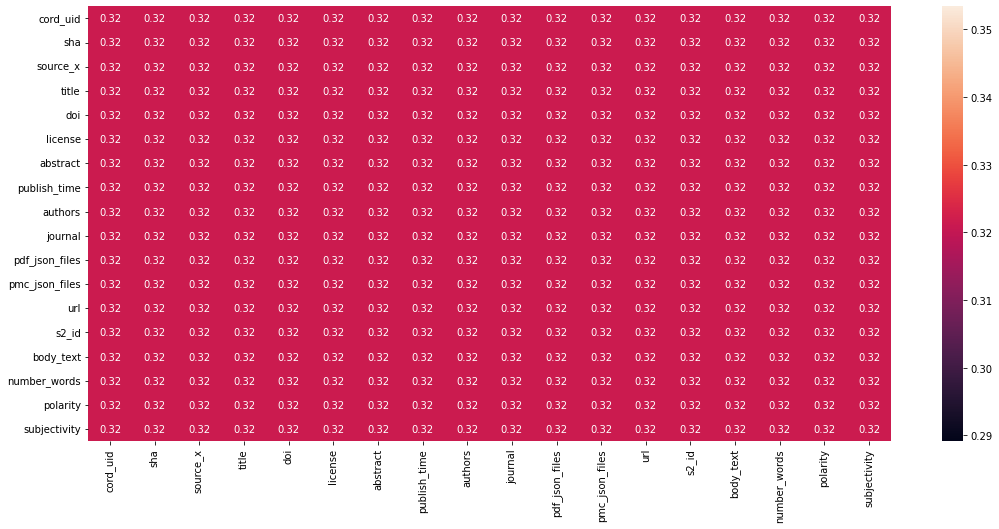

In [ ]:
import matplotlib.pyplot as plt
fig= plt.subplots(figsize=(18, 8))
sns.heatmap(df_corr, annot=True)
plt.show()

In [ ]:
df.head()

,cord_uid,sha,source_x,title,doi,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,"Betegón, Elena; Rodríguez-Medina, Jairo; del-V...",Int J Environ Res Public Health,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169,0.13,0.36
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,"Fisman, D.; Greer, A. L.; Tuite, A.",NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476,0.08,0.35
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,"Amano, Shiho; Ohta, Ryuichi; Sano, Chiaki",Cureus,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253,0.08,0.39
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,no-cc,We examined how object categories and scene co...,2022-04-14,"Kershner, Ariel M.; Hollingworth, Andrew",Atten Percept Psychophys,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089,0.03,0.37
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,cc-by,The goal of the present work was to examine cl...,2021-12-03,"Clouston, Sean A. P.; Luft, Benjamin J.; Sun, ...",Sci Rep,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767,0.06,0.44


In [ ]:
from datetime import datetime

def get_date(date):
    if date.find("-") != -1:
        return datetime.strptime(date, "%Y-%m-%d")
    else:
        return datetime.strptime(date, "%Y")

publish_year = df['publish_time'].apply(get_date)
publish_year = publish_year[publish_year > datetime.strptime("2000-1-1", "%Y-%m-%d")]

In [ ]:
publish_times_year = publish_year.dt.year

In [ ]:
publish_times_year

0      2022
1      2020
2      2021
3      2022
4      2021
       ... 
995    2020
996    2020
997    2021
998    2020
999    2022
Name: publish_time, Length: 994, dtype: int64

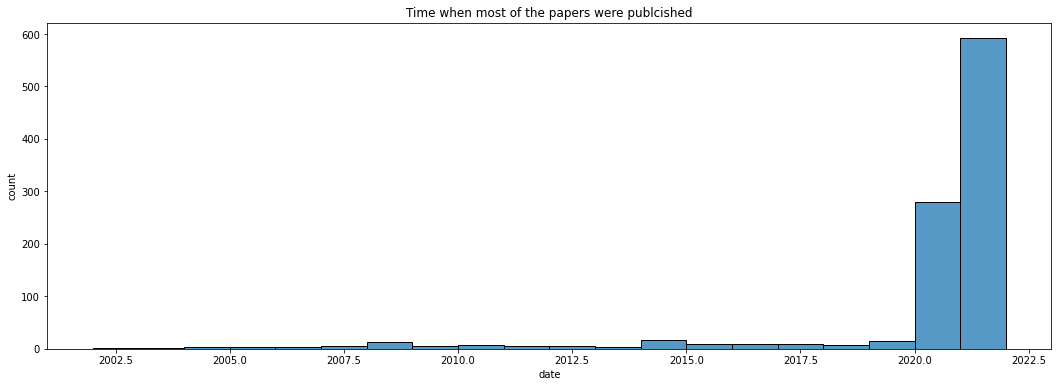

In [ ]:
import seaborn as sns
fig= plt.subplots(figsize=(18, 6))
sns.histplot(data = publish_times_year, bins=20)
plt.title("Time when most of the papers were publcished")
plt.xlabel("date")
plt.ylabel("count")
plt.show()

In [ ]:
### just check below we have
### https://www.kaggle.com/code/divyapatel4/topic-modelling-and-visualization-using-n

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


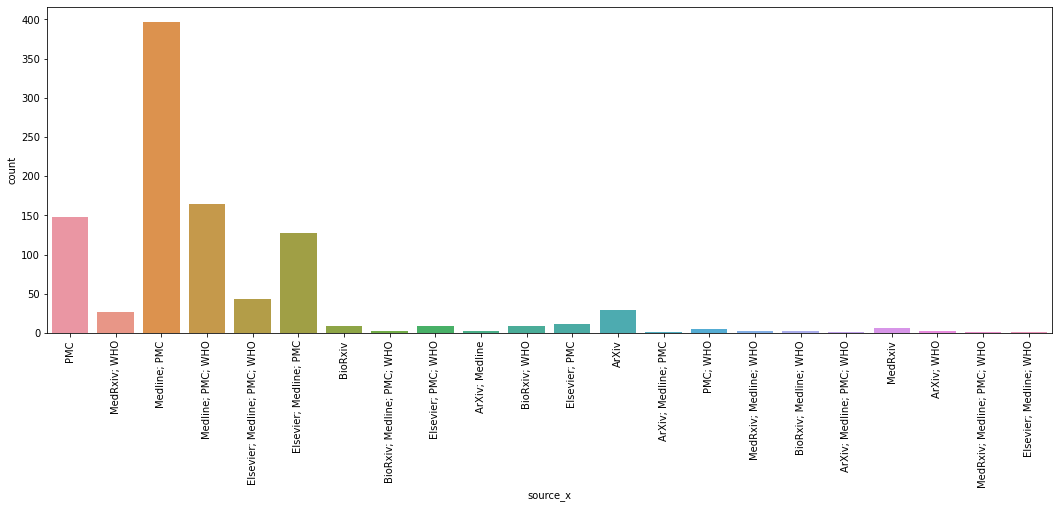

In [ ]:
### This will tells us from which source the data set has data collected from and we can also observe that most of the source from WHO.
plt.figure(figsize=(18, 6))
plt.hist('source_x',bins=20)
sns.countplot(df["source_x"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
### top 5 Articles which contain only less number of words 
rslt_df = df.sort_values(by = 'number_words').head()
title_less_Word_count = rslt_df[['title','number_words']]
title_less_Word_count

,title,number_words
763,Genes and genome editing tools for breeding de...,3
827,SARS-CoV-2 screening among people living in ho...,12
242,Long‐term antibody response following COVID‐19...,64
520,CHANGES IN HOSPITALIZATION IN CHILDREN DURING ...,69
831,A Higher Antibody Response Is Generated With a...,88


In [ ]:
### top 5 Articles which contain only more number of words 
rslt_df1 = df.sort_values(by = 'number_words').tail()
title_more_Word_count1 = rslt_df1[['title','number_words']]
title_more_Word_count1

,title,number_words
370,2021 ISHNE/ HRS/ EHRA/ APHRS collaborative sta...,11468
886,COVID-19 in Italy: targeted testing as a proxy...,12076
386,Molecular Design Strategies toward Improvement...,13407
761,14 Het gastro-intestinale systeem,25761
467,Symposium Summaries,37514


In [ ]:
#### https://www.kaggle.com/code/puneetsurya0921/data-analytics-task#Word-Cloud

* VECTORIZATION 